In [1]:
import pandas as pd
import numpy as np
import sklearn

# Pat 1 - Segmentation

In [2]:
lobsterland = pd.read_csv("lobsterland_2020.csv")

In [3]:
comeback = pd.read_csv("comeback.csv")
comeback.head()

,householdID,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate,homestate
0,1,11,111.45,8,63.18,1,213985,25,17,Massachusetts
1,2,9,98.36,11,59.46,3,152140,8,14,New Hampshire
2,3,6,90.70,10,29.00,2,117290,10,19,New Hampshire
3,4,4,77.90,17,50.12,4,69855,9,20,New Hampshire
4,5,10,76.82,10,43.14,3,150473,9,22,New Hampshire


A. The ID does not contain any relevent information that can tell us anything about the customers. Therefore, it won't add anything to the clustering model.

In [4]:
comeback = comeback.drop(['householdID'],axis = 1)
comeback.head()

,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate,homestate
0,11,111.45,8,63.18,1,213985,25,17,Massachusetts
1,9,98.36,11,59.46,3,152140,8,14,New Hampshire
2,6,90.70,10,29.00,2,117290,10,19,New Hampshire
3,4,77.90,17,50.12,4,69855,9,20,New Hampshire
4,10,76.82,10,43.14,3,150473,9,22,New Hampshire


B. The describe function shows us the important summary statistics for each column. This lets us understand what the overall distributions of data are in each column. It will give the the analyst a better understanding of which columns to focus on, or which columns are similar. Both of which can be important when building a model.

In [5]:
comeback.describe()

,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,8.512069,86.156914,12.186207,48.990259,2.631034,136389.822414,13.334483,20.189655
std,2.627382,19.483731,3.418908,12.637207,0.852753,29485.806498,3.323416,3.523211
min,1.000000,25.900000,0.000000,20.000000,1.000000,16470.000000,5.000000,11.000000
25%,7.000000,73.355000,10.000000,39.235000,2.000000,116792.750000,11.000000,18.000000
50%,9.000000,86.300000,12.000000,47.525000,3.000000,135626.500000,13.000000,20.000000
75%,10.000000,99.110000,15.000000,56.612500,3.000000,157771.000000,15.000000,22.000000
max,17.000000,145.850000,22.000000,91.880000,5.000000,213985.000000,27.000000,34.000000


C.
Visits_2019 and Online_merch_since19: The amount of visits since 2019 and the amount of online merchandise bought are correlated. This would make sense because customers that are likely to open the emails probably are likely to care about and like lobsterland, this makes them more likely to also go to the park. The emails also could contain park ticket promotions, which could likely make these variables correlated.

Online_merch_since19 and openrate: Similarly to above, people that open the emails are likely to have enjoyed their experience at lobster land and want to remember it. These people are liekly to buy online merchandise, and/or be more susceptible to online shopping promotions that are inside the emails.

In [6]:
import seaborn as sn

In [7]:
comeback = comeback.drop(['homestate'],axis = 1)

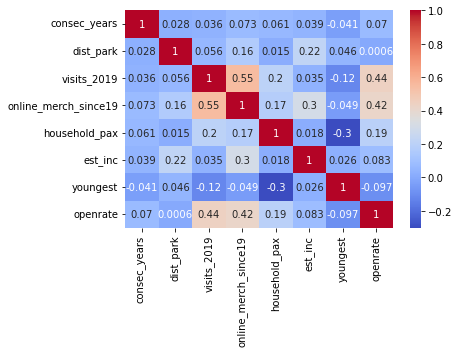

In [8]:
comeback_cors = comeback.corr()
hm = sn.heatmap(data = comeback_cors,
                annot = True,
                cmap="coolwarm")

D. Yes, because they have highly variable means and standard deviations. This could skew the data. Standardizing will help imprive the accuracy of the model.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(comeback)
comeback_normalized = scaler.transform(comeback)
comeback_normalized = pd.DataFrame(data=comeback_normalized,
                                   index = comeback.index, 
                                   columns = comeback.columns)

comeback_normalized

,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate
0,0.947741,1.299285,-1.225485,1.123823,-1.914321,2.633883,3.513128,-0.906108
1,0.185870,0.626862,-0.347254,0.829201,0.433049,0.534622,-1.606506,-1.758338
2,-0.956936,0.233375,-0.639998,-1.583223,-0.740636,-0.648322,-1.004196,-0.337954
3,-1.718808,-0.424151,1.409207,0.089475,1.606734,-2.258451,-1.305351,-0.053877
4,0.566806,-0.479630,-0.639998,-0.463339,0.433049,0.478038,-1.305351,0.514277
...,...,...,...,...,...,...,...,...
575,0.185870,-0.499150,0.238233,-0.347707,0.433049,-0.408101,-0.703041,-0.053877
576,0.566806,1.554590,-0.054511,0.661297,0.433049,0.142299,-0.401886,1.082431
577,0.947741,-0.030149,-0.932742,-0.151292,-1.914321,0.890830,2.609663,0.798354
578,0.947741,-0.820721,-0.347254,-0.298603,-0.740636,-0.349820,-0.100731,-0.622031


E.

In [10]:
from sklearn.cluster import KMeans

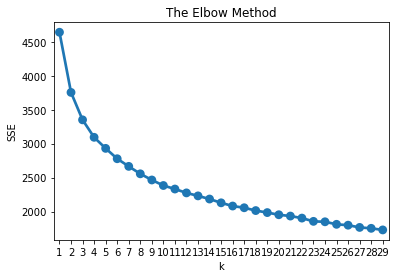

In [11]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1,30):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=101)
    # Fit KMeans on the normalized dataset
    kmeans.fit(comeback_normalized)
    sse[k] = kmeans.inertia_
 
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

sn.pointplot(x=list(sse.keys()), y=list(sse.values()));

F.

It seems like there's an elbow somewhere between 4 and 7. I'm going to choose 5 as the number of clusters to run

G.

In [12]:
kmeans = KMeans(n_clusters = 5, random_state=101)
kmeans = kmeans.fit(comeback_normalized)
cluster_labels = kmeans.labels_

H.

In [13]:
kmeans2 = comeback.assign(Cluster=cluster_labels)
kmeans3 = kmeans2.groupby(['Cluster']).agg({
    'consec_years': 'mean',
    'dist_park': 'mean',
    'visits_2019': 'mean',
    'online_merch_since19': 'mean',
    'household_pax': 'mean',
    'est_inc': 'mean',
    'youngest': 'mean',
    'openrate': 'mean',
  }).round(2)

m = pd.DataFrame(data = comeback.mean())
s = pd.DataFrame(data = comeback.std())

comeback3 = pd.concat([kmeans3, m.T, s.T])

comeback3.index = [1,2,3,4,5,6,7]

comeback3.rename(index={6: "Mean", 7: "Std"}).round(2)

,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate
1,7.69,72.07,10.23,37.70,2.62,104549.69,12.48,19.40
2,8.86,89.02,16.31,63.77,3.01,139508.49,12.71,24.09
3,6.49,91.94,11.04,48.69,2.87,155954.33,12.86,18.51
4,8.08,87.64,10.58,44.32,1.56,136944.05,18.36,18.25
5,11.21,90.68,11.29,45.78,2.59,146001.42,12.38,19.09
Mean,8.51,86.16,12.19,48.99,2.63,136389.82,13.33,20.19
Std,2.63,19.48,3.42,12.64,0.85,29485.81,3.32,3.52


In [14]:
kmeans2.head()

,consec_years,dist_park,visits_2019,online_merch_since19,household_pax,est_inc,youngest,openrate,Cluster
0,11,111.45,8,63.18,1,213985,25,17,3
1,9,98.36,11,59.46,3,152140,8,14,2
2,6,90.70,10,29.00,2,117290,10,19,0
3,4,77.90,17,50.12,4,69855,9,20,0
4,10,76.82,10,43.14,3,150473,9,22,4


I. Barchart, Histogram, Scatterplot

The top bar chart shows us how the numbers of visits differ between clusters. People in cluster 1 tend to visit the park more often than other cluster. The bottom bar chart shows us the average distances families live from the park. It's interesting that cluster 0 lives the closest, but also has the least amount of visits.

<AxesSubplot:xlabel='Cluster', ylabel='visits_2019'>

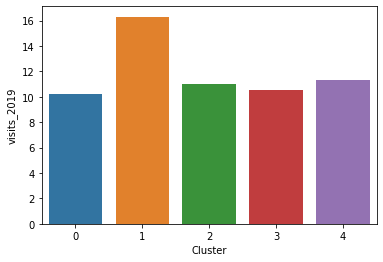

In [15]:
sn.barplot(x='Cluster', y='visits_2019', ci= None, data=kmeans2)

<AxesSubplot:xlabel='Cluster', ylabel='dist_park'>

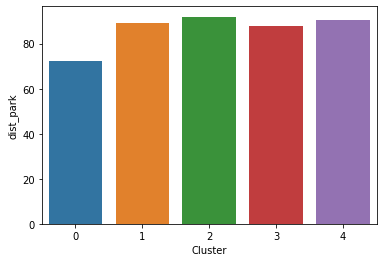

In [16]:
sn.barplot(x='Cluster', y='dist_park', ci= None, data=kmeans2)

These faceted histograms show the different distributions clusters and years having season passes. These definitely tell us something about the data. For example, cluster 4 make up people that have had season passes for 9 years or more, whereas cluster 2 is people who have had passes 9 years or less.

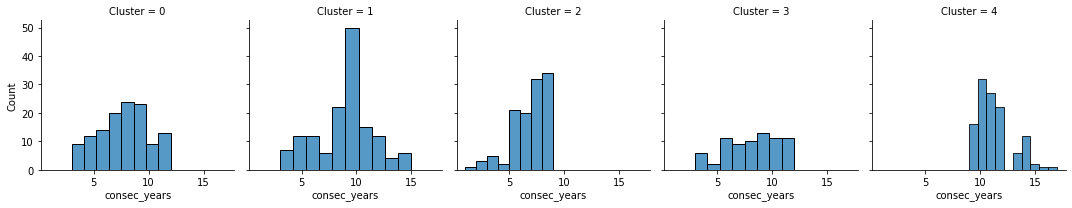

In [17]:
g = sn.FacetGrid(col='Cluster',data=kmeans2,legend_out=False)
g.map(sn.histplot,'consec_years')

These two sets of feceted scatterplots show us further differences about each cluster and allow us to make more specific assumptions about what groups these clusters might represent. 

For instance, you can see that cluster 4 represents households who have had season passes for many years (histogram), but also have children on the younger side (top scatterplot). This means they probably got the season pass around the time the child was young and have been going ever since.

Comparing the two scatterplot grids you can also see that cluster 1 represents people that have higher household income, younger kids, and buy a lot of online merchandise. However, cluster 4 is made up of people with higher income, younger kids, but they tend to buy less online merchandise.

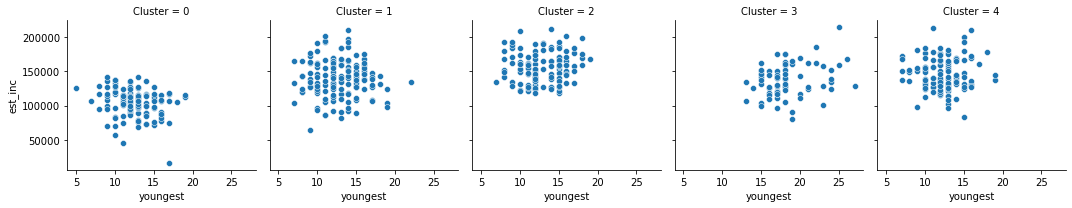

In [18]:
g = sn.FacetGrid(col='Cluster',data=kmeans2,legend_out=False)
g.map(sn.scatterplot,'youngest','est_inc')

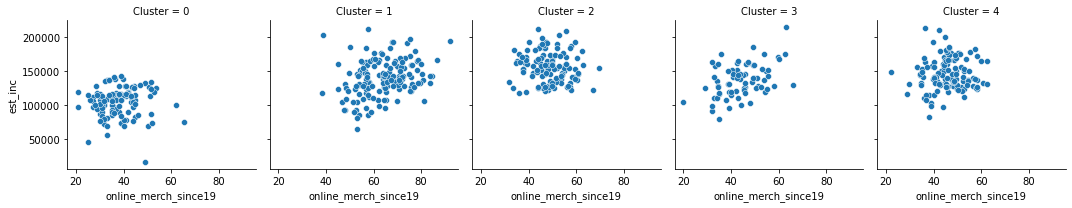

In [19]:
g = sn.FacetGrid(col='Cluster',data=kmeans2,legend_out=False)
g.map(sn.scatterplot,'online_merch_since19','est_inc')

J.

Cluster 0: Families That Come When They Can
- Cluster 0 represents families that have lower incomes, have younger children, and also visited the park the least in 2019. This makes sense given the families may have less money or time to spend on going to the park. They also on average live the closest, which rules out distance being a negating factor in why the visits are lower.

Cluster 1: Kids Love Lobster Land
- Cluster 1 is made up of families with younger children who visit the park very often, and have higher estimated incomes. They also tend to buy more online merchandise than any other cluster and be season pass holders for a decently long amount of time. 

Cluster 2: Rich New Comers
- Cluster 2 is made up of higher income families with younger children. Unlike cluster 2 they are more recent season pass holders. It'd be safe to say these people are newer to the park, and maybe the area, and are looking for things to do as a family.

Cluster 3: Young adults
- Cluster 3 is made up of what looks like families with younger children in their mid to late teens, as well as young adults in their early 20s. This cluster represents a gen x, y, z segment that should be marketed to accordingly.

Cluster 4: Returning lobster lovers
- Cluster 4 are the long time pass holders. It looks like they are mostly families that probably bought a season pass when their children were young and have continued to go thoughout the years (majority consec_years is around 11-12 and the youngest in household is majority around 11-12 years. They keep coming back, which is great for customer lifetime value. Promotions to this segment would probably include something like a club pass or club credit. After being pass holders for so long they get 10% off all retail clothing items or something like that. This would also drive up merchandise sales for the cluster hopefully.



# Part II - Conjoint Analysis

A.

In [20]:
coaster_choices = pd.read_csv("coaster_choices.csv")
coaster_choices.isnull().values.any()

False

B.

Categorical: rocketlaunch, material, track_color

Numerical: maxspeed, seats_car, drop, avg_rating

C.

In [21]:
coaster_choices2 = pd.get_dummies(coaster_choices, 
                                  columns=['rocketlaunch','maxspeed', 'material', 'seats_car','drop','track_color'], 
                                  drop_first=True)
coaster_choices2.head()

,avg_rating,rocketlaunch_Yes,maxspeed_60,maxspeed_80,material_Wood,seats_car_4,drop_200,drop_300,track_color_green,track_color_red,track_color_white
0,9.669,1,0,0,0,0,0,0,0,1,0
1,5.288,1,0,0,0,0,0,0,0,0,0
2,2.121,1,0,0,0,0,0,0,1,0,0
3,5.576,1,0,0,0,0,0,0,0,0,1
4,8.272,1,0,0,0,0,1,0,0,1,0


We converted all of the varaibles to dummies because linear models can only understand numerical data. This is the only way we can build a reliable model that predicts a numerical outcome variable, in this case the avg_rating.

D.

In [22]:
coaster_choices2.columns

Index(['avg_rating', 'rocketlaunch_Yes', 'maxspeed_60', 'maxspeed_80',
       'material_Wood', 'seats_car_4', 'drop_200', 'drop_300',
       'track_color_green', 'track_color_red', 'track_color_white'],
      dtype='object')

In [23]:
x = coaster_choices2[['rocketlaunch_Yes', 'maxspeed_60', 'maxspeed_80',
       'material_Wood', 'seats_car_4', 'drop_200', 'drop_300',
       'track_color_green', 'track_color_red', 'track_color_white']]
y = coaster_choices2['avg_rating']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

E.

In [25]:
regressor.intercept_

4.0640555555555515

In [26]:
coef_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coef_df

,Coefficient
rocketlaunch_Yes,0.980514
maxspeed_60,1.937927
maxspeed_80,1.303698
material_Wood,-0.619986
seats_car_4,-0.526125
drop_200,0.880396
drop_300,0.850167
track_color_green,0.386097
track_color_red,1.943069
track_color_white,-0.242778


F.

Our model shows us that park goers prefer exciting, jolting rides, that offer both a feeling of privacy and safety. As you can see above from the coefficients, respondents reacted well to rides that had more "rocketlaunch", or extreme acceleration, over rides that went slowly. Similarly they also liked rides with max speeds of 60 or 80 over rides with 40mph. The material of the ride being made out of wood probably represented less safety or maybe a sense of overall cheapness, which respondents did not like. Having 4 seats vs 2 was also a negative overall. This probably was due to people being lumped together with strangers. Again, larger drops are more exhilerating, which respondents were favorable too, as well as red track color. The red track color represented more "thrill" in the riders mind, which made the roller coaster more of a rush.